In [60]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import subprocess as subp

In [75]:
cd ~/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/

/home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4


In [76]:
ls

2019-07-14_6_24_chr_low_del_dupl_1e4_noSex/
2019-07-14_6_24_chr_low_del_dupl_1e4_noSex.tar.gz
2019-07-14_6_24_chr_low_del_dupl_1e4_optim/
2019-07-14_6_24_chr_low_del_dupl_1e4.tar.gz
24_6_chr_1250gen_DD_1e4.csv
indvMean.png
INV_time_trajc_slowDD_1e4.png
TemplateForINVinTime.json
Template.json*


In [77]:
#df = pd.read_csv("DD_1e6_10k_comperison.csv", delimiter=' ')
#df = pd.read_csv("DD_1e6_comperison.csv", delimiter=' ')
#df = pd.read_csv("24_6_chr_1250gen_DD_1e6.csv", delimiter=',')
df = pd.read_csv("24_6_chr_1250gen_DD_1e4.csv", delimiter=',')

In [78]:
df.head(10)

,DelDupl,SEXSELECT,patho_mut,patho_spp,meanAllel,stdAllel,slope,indvMean,indvSTD,meanFitt,meanCvFitt,meanPatho,stdPato
0,0.0001,PropShrd_6chr,0.00001,8,64.098,5.0316,-0.001647,19.117,2.9832,0.33169,0.003671,0.28911,0.12950
1,0.0001,PropShrd_6chr,0.00001,8,64.281,7.6020,0.008474,18.691,2.6873,0.28396,0.003577,0.25271,0.10867
2,0.0001,PropShrd_6chr,0.00001,8,65.873,7.2602,0.011372,18.690,3.8111,0.33826,0.003336,0.30875,0.11610
3,0.0001,PropShrd_6chr,0.00001,8,72.184,11.5960,0.025410,22.679,4.9348,0.31821,0.003651,0.27973,0.12290
4,0.0001,PropShrd_6chr,0.00001,8,78.790,6.3557,0.001373,23.827,2.8826,0.31414,0.003795,0.27385,0.12408
5,0.0001,PropShrd_6chr,0.00001,8,79.378,7.5509,0.008916,22.722,4.6171,0.33175,0.003444,0.29895,0.12721
6,0.0001,PropShrd_6chr,0.00001,8,83.191,6.4043,0.000666,25.053,3.8116,0.33096,0.003946,0.28831,0.13064
7,0.0001,PropShrd_6chr,0.00001,8,86.982,7.3835,-0.013794,25.975,7.5987,0.38869,0.003510,0.35108,0.13890
8,0.0001,PropShrd_6chr,0.00001,8,87.118,6.7345,0.007741,26.227,4.3853,0.32262,0.003636,0.28742,0.12085
9,0.0001,PropShrd_6chr,0.00001,8,88.150,7.5016,-0.005778,25.667,3.7052,0.31572,0.003749,0.27969,0.12403


In [79]:
ax_label = 26
T_label = 30
TicksFS = 24

In [80]:
myPallt = ["#6ACC65", "#4878CF", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
palDct = {"4": myPallt[0], "8": myPallt[1], "16": myPallt[2]}
def plotBox(what, df, patho_mut, ymaxx=None, legd=True, mPlt=myPallt):
    """Fast plot of what we want"""
    ax = sns.boxplot(x="SEXSELECT", y=what, hue="DelDupl", data=df, palette=mPlt)
    ax.legend_.remove()
    if legd:
        plt.legend(title="del./dupl. mut.",title_fontsize=TicksFS-4, fontsize=TicksFS-2, loc=2, edgecolor='white')
    #plt.xlabel("sexual selection mode",fontsize=ax_label)
    plt.xticks(fontsize=TicksFS)
    plt.yticks(fontsize=TicksFS)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.grid(True, axis="y")
    if ymaxx:
        plt.ylim((0, ymaxx))

In [81]:
df_1e5 = df[df.patho_mut == 1e-5]
df_5e5 = df[df.patho_mut == 5e-5]

ValueError: min() arg is an empty sequence

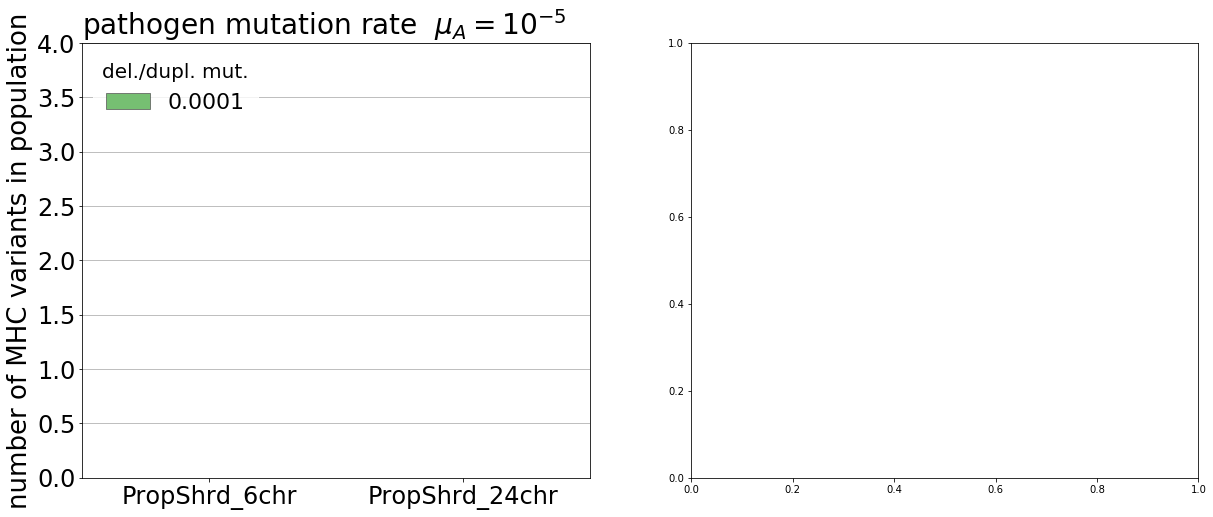

In [82]:
plt.figure(figsize=(20,8))

patho_mut = 0.00001
plt.subplot(121)
what = "indvMean"
plotBox(what, df_1e5, patho_mut, 4, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("number of MHC variants in population", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(122)
what = "indvMean"
plotBox(what, df_5e5, patho_mut, 4, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')

plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("FigS1.png")
plt.show()

ValueError: min() arg is an empty sequence

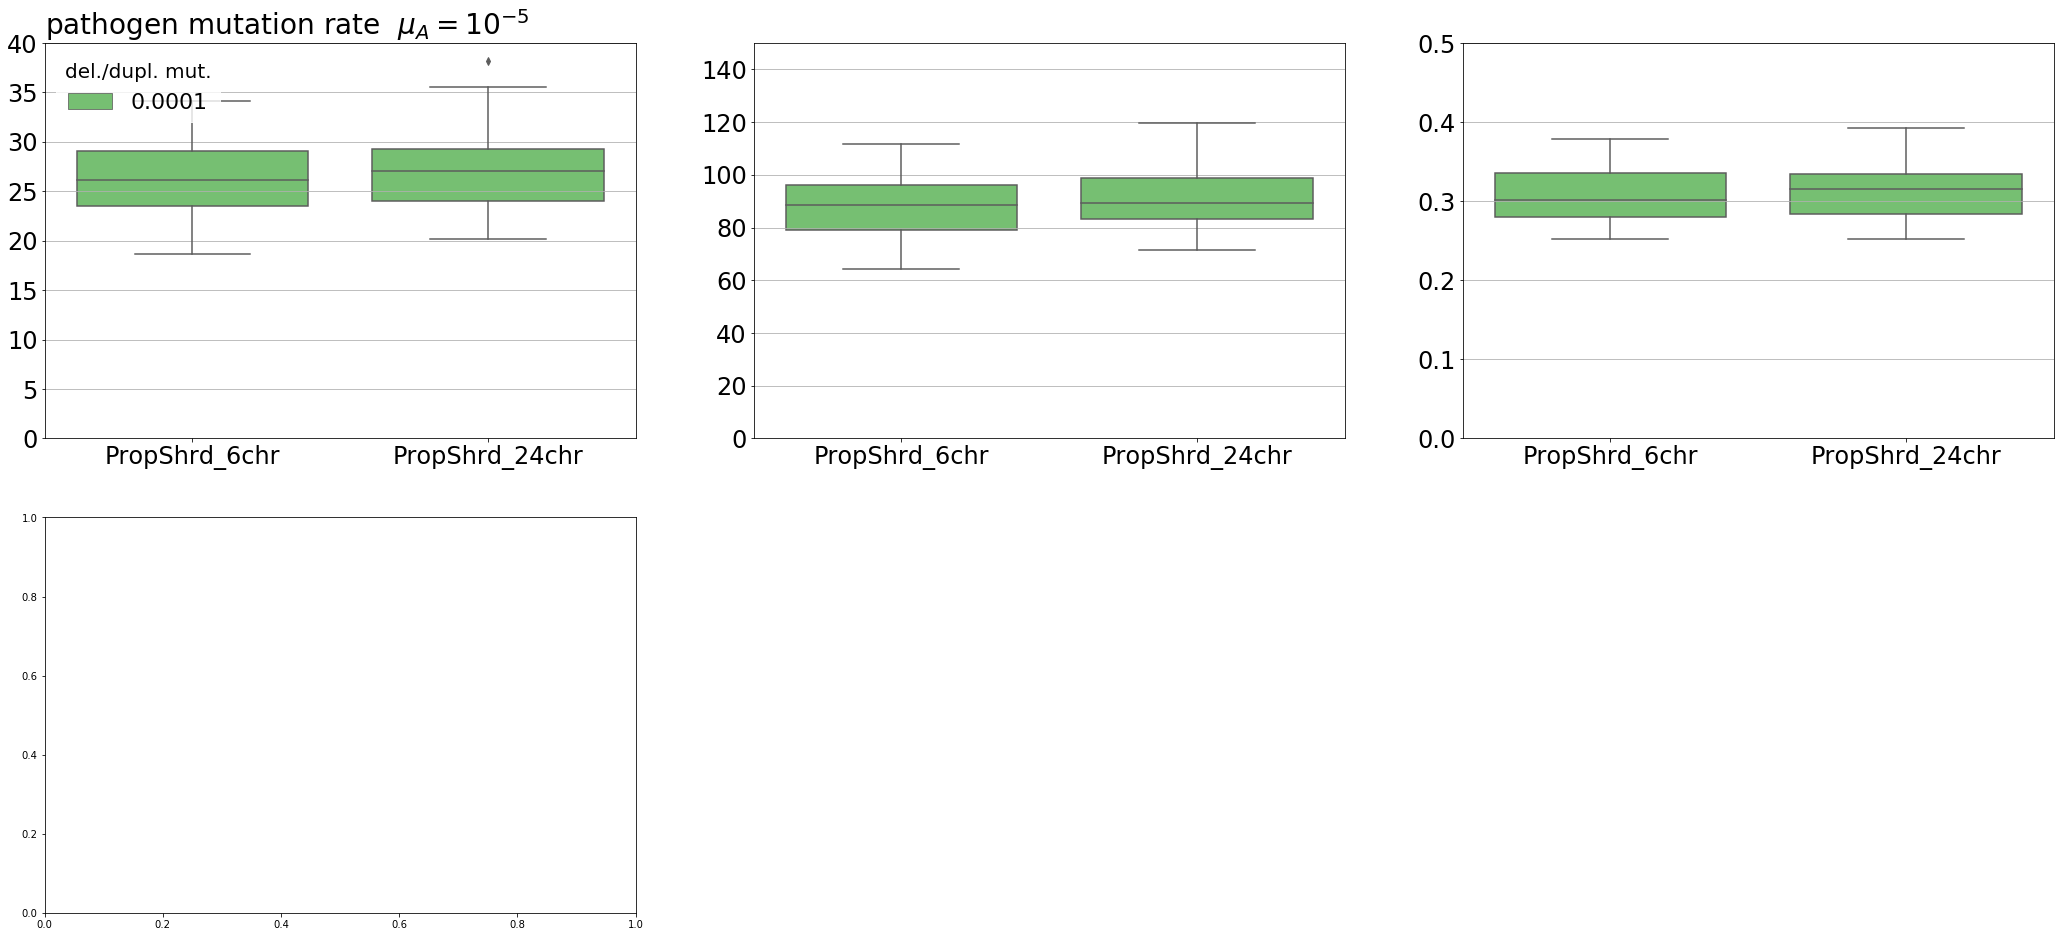

In [83]:
plt.figure(figsize=(36,16))

patho_mut = 0.00001
plt.subplot(231)
what = "indvMean"
plotBox(what, df_1e5, patho_mut, 40, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("number of MHC variants in individual", fontsize=ax_label)
plt.subplot(232)
what = "meanAllel"
plotBox(what, df_1e5, patho_mut, 150, False)
#plt.ylabel("number of MHC variants in population", fontsize=ax_label)
plt.subplot(233)
what = "meanPatho"
plotBox(what, df_1e5, patho_mut, 0.5, False)
#plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(234)
what = "indvMean"
plotBox(what, df_5e5, patho_mut, 70, True)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')
plt.subplot(235)
what = "meanAllel"
plotBox(what, df_5e5, patho_mut, 250, False)
plt.ylabel("        number of MHC variants in population", fontsize=ax_label, horizontalalignment='left')
plt.subplot(236)
what = "meanPatho"
plotBox(what, df_5e5, patho_mut, 0.5, False)
plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label, horizontalalignment='left')
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("sexSelectComprFull.png")
plt.show()

# 

In [84]:
cd ~/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/

/home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4


In [85]:
df = pd.read_csv("24_6_chr_1250gen_DD_1e4.csv", delimiter=',')
df.head(10)

,DelDupl,SEXSELECT,patho_mut,patho_spp,meanAllel,stdAllel,slope,indvMean,indvSTD,meanFitt,meanCvFitt,meanPatho,stdPato
0,0.0001,PropShrd_6chr,0.00001,8,64.098,5.0316,-0.001647,19.117,2.9832,0.33169,0.003671,0.28911,0.12950
1,0.0001,PropShrd_6chr,0.00001,8,64.281,7.6020,0.008474,18.691,2.6873,0.28396,0.003577,0.25271,0.10867
2,0.0001,PropShrd_6chr,0.00001,8,65.873,7.2602,0.011372,18.690,3.8111,0.33826,0.003336,0.30875,0.11610
3,0.0001,PropShrd_6chr,0.00001,8,72.184,11.5960,0.025410,22.679,4.9348,0.31821,0.003651,0.27973,0.12290
4,0.0001,PropShrd_6chr,0.00001,8,78.790,6.3557,0.001373,23.827,2.8826,0.31414,0.003795,0.27385,0.12408
5,0.0001,PropShrd_6chr,0.00001,8,79.378,7.5509,0.008916,22.722,4.6171,0.33175,0.003444,0.29895,0.12721
6,0.0001,PropShrd_6chr,0.00001,8,83.191,6.4043,0.000666,25.053,3.8116,0.33096,0.003946,0.28831,0.13064
7,0.0001,PropShrd_6chr,0.00001,8,86.982,7.3835,-0.013794,25.975,7.5987,0.38869,0.003510,0.35108,0.13890
8,0.0001,PropShrd_6chr,0.00001,8,87.118,6.7345,0.007741,26.227,4.3853,0.32262,0.003636,0.28742,0.12085
9,0.0001,PropShrd_6chr,0.00001,8,88.150,7.5016,-0.005778,25.667,3.7052,0.31572,0.003749,0.27969,0.12403


In [86]:
df.columns

Index(['DelDupl', 'SEXSELECT', 'patho_mut', 'patho_spp', 'meanAllel',
       'stdAllel', 'slope', 'indvMean', 'indvSTD', 'meanFitt', 'meanCvFitt',
       'meanPatho', 'stdPato'],
      dtype='object')

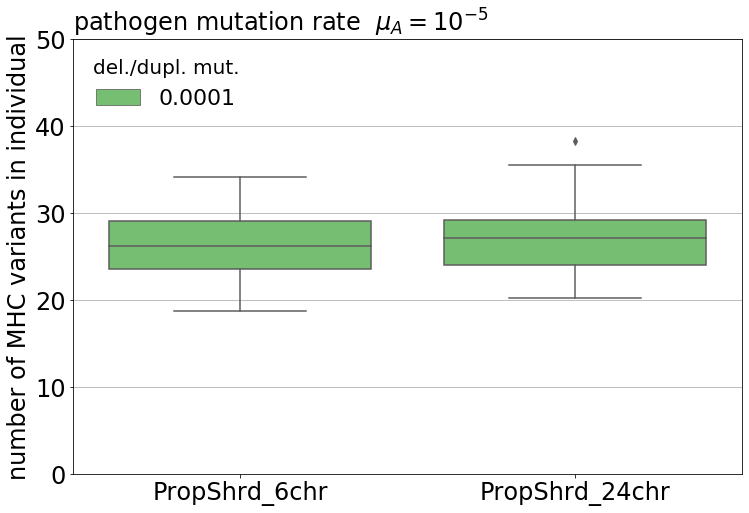

In [89]:
patho_mut = 0.00001
what = "indvMean"
plt.figure(1, figsize=(12, 8))
plotBox(what, df, patho_mut, 50, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label-2)
plt.ylabel("number of MHC variants in individual", fontsize=ax_label-2)
#plt.ylabel("number of MHC variants in population", fontsize=ax_label-2)
#plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label-2)
#plt.ylabel("mean normalised fitness", fontsize=ax_label-2)
plt.savefig(what + ".png")


In [23]:
x = []
for itm in np.unique(df['SEXSELECT']):
    x.append(np.array(df[df['SEXSELECT'] == itm]['indvMean']))
    print(itm, "mean is:", np.mean(df[df['SEXSELECT'] == itm]['indvMean']))

PropShrd_24chr mean is: 27.492699999999996
PropShrd_6chr mean is: 26.04355


In [24]:
y = []
begin = np.array([48, 12])
for i, itm in enumerate(x):
    y.append(np.ones(len(itm)) * begin[i])

In [25]:
from scipy import stats

In [26]:
for itm in zip(x, y):
    t2, p2 = stats.ttest_ind(itm[0], itm[1])
    print("t = " + str(t2))
    print("p = " + str(p2))

t = -18.737715734624857
p = 8.610363928866577e-21
t = 14.980753137309947
p = 1.5710561034759682e-17


In [27]:
df_1 = pd.read_csv("/home/piotr/Documents/MHC_UAM/sexSelectNew/Integr_reduc_1e5.csv")

In [28]:
df_1.head(10)

,patho_spp,SEXSELECT,meanAllel,stdAllel,slope,indvMean,indvSTD,meanFitt,meanCvFitt,meanPatho,stdPato
0,4,Random,2.9160,1.4092,-0.000936,1.2488,0.43246,0.17737,0.000457,0.16707,0.11809
1,4,Random,8.1192,4.7903,0.011070,3.5119,1.30060,0.17330,0.001575,0.15177,0.13080
2,4,Random,8.2344,5.1465,0.011872,3.0534,1.25300,0.20102,0.002386,0.18107,0.14970
3,4,Random,9.1536,4.6518,0.008094,3.9237,1.09830,0.22501,0.001276,0.20430,0.19280
4,4,Random,9.4128,5.4823,-0.006465,3.6940,0.93485,0.23709,0.001675,0.21484,0.18397
5,4,Random,10.6690,4.4704,0.004253,4.4390,1.19730,0.23428,0.002435,0.21023,0.14274
6,4,Random,12.7300,5.5718,0.012030,5.8167,1.11730,0.20200,0.002408,0.16841,0.16885
7,4,Random,16.4620,3.4529,0.003868,5.1397,1.17990,0.33031,0.001566,0.32644,0.11713
8,4,Random,16.9840,7.2647,0.007198,7.1464,2.20470,0.26695,0.002933,0.22964,0.21834
9,4,Random,22.2100,6.1202,0.009549,6.9920,1.19650,0.28400,0.001799,0.27046,0.13385


In [29]:
df_old = df_1[(df_1['SEXSELECT'] == "PropShared") & (df_1['patho_spp'] == 8)]

In [30]:
df_old

,patho_spp,SEXSELECT,meanAllel,stdAllel,slope,indvMean,indvSTD,meanFitt,meanCvFitt,meanPatho,stdPato
100,8,PropShared,61.988,8.9795,0.017632,16.931,4.1218,0.40244,0.003212,0.36744,0.13151
101,8,PropShared,65.270,20.5540,-0.039259,18.956,14.3570,0.26137,0.004226,0.23507,0.12150
102,8,PropShared,67.949,11.4780,-0.001329,19.605,9.2034,0.38181,0.003891,0.34080,0.14108
103,8,PropShared,70.177,15.5020,0.030674,21.343,13.4390,0.28055,0.003833,0.25102,0.11306
104,8,PropShared,76.486,11.3270,0.016379,22.469,5.6178,0.33015,0.003866,0.28841,0.13010
105,8,PropShared,77.276,9.6577,0.006498,25.078,9.2949,0.33765,0.003985,0.29607,0.13856
106,8,PropShared,78.652,14.1780,-0.020140,21.533,10.9760,0.30810,0.003635,0.28228,0.10779
107,8,PropShared,80.310,13.4540,0.016098,22.706,7.5500,0.29623,0.003855,0.25935,0.11779
108,8,PropShared,80.654,8.5934,0.016216,24.399,12.2030,0.30881,0.004247,0.27347,0.13631
109,8,PropShared,80.767,12.2950,0.012420,26.952,16.7640,0.29338,0.004502,0.25538,0.13194


In [31]:
print(np.mean(df_old['indvMean']))

24.868700000000004


In [65]:
cd ~/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/2019-07-14_6_24_chr_low_del_dupl_1e4_optim

/home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/2019-07-14_6_24_chr_low_del_dupl_1e4_optim


In [71]:
sys.path.append("/home/piotr/CodeProjects/MhcEvo2000/PyScripts/")
import packed_plots_of_MHC_alleles as ppma
import average_INV_mutliRun as ainv

In [72]:
dd = os.getcwd()
template = ppma.loadParamSettings("../TemplateForINVinTime.json")
startDate = ppma.readDate("2019-01-01")

In [73]:
inv = ainv.getTheData(startDate, template, dd)

Done dir: /home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/2019-07-14_6_24_chr_low_del_dupl_1e4_optim/MHC.25
Done dir: /home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/2019-07-14_6_24_chr_low_del_dupl_1e4_optim/MHC.32
Done dir: /home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/2019-07-14_6_24_chr_low_del_dupl_1e4_optim/MHC.34
Done dir: /home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/2019-07-14_6_24_chr_low_del_dupl_1e4_optim/MHC.4
Done dir: /home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/2019-07-14_6_24_chr_low_del_dupl_1e4_optim/MHC.40
Done dir: /home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/2019-07-14_6_24_chr_low_del_dupl_1e4_optim/MHC.11
Done dir: /home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/2019-07-14_6_24_chr_low_del_dupl_1e4_optim/MHC.18
Done dir: /home/piotr/Documents/MHC_UAM/SexSelect_low_del_dupl/6_24_del_dupl_1e4/201

In [74]:
aggrOutCI = ainv.aggrDataByRunsCI(inv)